<a href="https://colab.research.google.com/github/alaka2019/Cancer-Death-Rate/blob/main/Datathon_2_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datathon-2: Notebook Submission
This is a template for Assignment 3 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 


## Task 1

### Import Libraries

In [ ]:
!pip install Boruta

     |████████████████████████████████| 61kB 4.3MB/s 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from boruta import BorutaPy

### Load the data and display first 5 rows.

In [ ]:
traindata  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
testdata = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [ ]:
traindata.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [ ]:
testdata.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


### Perform Exploratory Data Analysis

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [ ]:
traindata.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [ ]:
testdata.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [ ]:
testdata.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,182.000000,762.000000,762.000000,762.000000,729.000000,762.000000,762.000000,614.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,711.605491,220.711286,447.204162,47029.500000,1.282696e+05,16.980315,147.999759,47.133858,39.620997,42.022178,2.500591,51.539108,18.150394,35.191207,40.574176,6.231102,34.533333,13.391207,54.027435,7.967585,63.701050,47.805700,40.608661,36.477428,19.569554,82.788278,8.896343,1.340419,2.254919,50.926053,5.736898
std,1940.045693,695.011673,56.745238,11986.997138,4.792013e+05,6.536684,480.782424,56.374276,5.469577,5.491687,0.403520,7.181519,7.939906,9.011131,11.438374,4.225098,7.113428,5.503342,8.535290,3.534852,11.037942,10.386014,9.816577,8.237832,6.459500,17.320289,14.432993,2.972052,4.090086,6.800150,2.065069
min,7.000000,3.000000,201.300000,24707.000000,1.337000e+03,4.000000,0.000000,23.300000,22.800000,22.800000,0.024000,23.100000,1.500000,7.100000,10.100000,0.000000,11.500000,2.500000,23.900000,0.700000,22.300000,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,68.000000,26.000000,417.375000,38730.500000,1.075350e+04,12.300000,0.000000,37.500000,36.225000,38.900000,2.370000,47.700000,12.700000,29.125000,33.700000,3.225000,29.625000,9.500000,48.100000,5.800000,56.300000,39.950000,33.525000,30.800000,14.925000,76.468705,0.613335,0.236915,0.297753,47.607275,4.608878
50%,162.500000,60.000000,453.549422,45238.500000,2.611850e+04,15.800000,0.000000,41.100000,39.800000,42.350000,2.500000,52.250000,17.100000,35.000000,39.300000,5.500000,34.950000,12.300000,54.600000,7.500000,64.300000,48.250000,40.600000,36.600000,18.950000,89.464327,2.120925,0.538765,0.846727,51.336903,5.367187
75%,535.750000,151.000000,479.875000,52310.500000,7.086150e+04,20.400000,80.313645,44.275000,42.875000,45.500000,2.640000,56.100000,22.975000,40.575000,45.475000,8.375000,39.500000,16.100000,60.100000,9.900000,71.800000,55.500000,47.275000,42.175000,23.775000,95.162772,10.811476,1.325862,2.382843,55.208111,6.583930
max,38150.000000,14010.000000,1014.200000,103876.000000,1.017029e+07,47.400000,6810.442679,624.000000,58.600000,58.000000,3.970000,72.300000,59.100000,66.200000,78.300000,32.600000,50.200000,42.200000,80.100000,25.400000,87.900000,76.300000,68.800000,62.200000,43.300000,99.693045,85.947799,42.619425,41.930251,78.075397,18.556701


### Separate the Input and Target Features of the data

In [ ]:
X_train = traindata.drop('TARGET_deathRate',axis = 1)
y_train = traindata['TARGET_deathRate']

### Split the data into Train and Test Sets

In [ ]:
X_test = testdata

## Task 2

### Perform Data Preparation Steps

In [ ]:
X_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033


In [ ]:
X_train['binnedInc'].value_counts()

(51046.4, 54545.6]    318
(37413.8, 40362.7]    318
(54545.6, 61494.5]    315
(34218.1, 37413.8]    309
(42724.4, 45201]      306
(40362.7, 42724.4]    306
[22640, 34218.1]      301
(45201, 48021.6]      299
(48021.6, 51046.4]    297
(61494.5, 125635]     282
Name: binnedInc, dtype: int64

In [ ]:
xt=X_train.copy()

In [ ]:
def editcol(x):
  x=str(x)
  x=x[0:][1:-1]
  return x
xt['binnedInc'] = xt['binnedInc'].apply(editcol)
xt.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"48021.6, 51046.4",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116
1,88.0,34,486.0,59399,14844,9.7,0.0,"54545.6, 61494.5",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510
2,195.0,83,475.7,39721,25164,18.5,0.0,"37413.8, 40362.7",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328
3,116.0,55,496.6,30299,17917,28.1,0.0,"22640, 34218.1",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836
4,80.0,35,372.0,39625,14058,17.4,0.0,"37413.8, 40362.7",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033


In [ ]:
inc = xt['binnedInc'].str.get_dummies(sep=', ') # split all the entries separated by space and create dummy variable
inc.head()

,125635,22640,34218.1,37413.8,40362.7,42724.4,45201,48021.6,51046.4,54545.6,61494.5
0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,1,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
X_train = pd.concat([X_train, inc], axis=1) 

In [ ]:
X_train = X_train.drop('binnedInc', axis=1)

In [ ]:
X_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,125635,22640,34218.1,37413.8,40362.7,42724.4,45201,48021.6,51046.4,54545.6,61494.5
0,19.0,8,481.5,50038,2704,11.1,0.0,48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,0,0,0,0,0,0,0,1,1,0,0
1,88.0,34,486.0,59399,14844,9.7,0.0,41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,0,0,0,0,0,0,0,0,0,1,1
2,195.0,83,475.7,39721,25164,18.5,0.0,48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,0,0,0,1,1,0,0,0,0,0,0
3,116.0,55,496.6,30299,17917,28.1,0.0,44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,0,1,1,0,0,0,0,0,0,0,0
4,80.0,35,372.0,39625,14058,17.4,0.0,45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
X_train.drop(['Geography'], axis =1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   MedianAge                3051 non-null   float64
 8   MedianAgeMale            3051 non-null   float64
 9   MedianAgeFemale          3051 non-null   float64
 10  AvgHouseholdSize         3051 non-null   float64
 11  PercentMarried           3051 non-null   float64
 12  PctNoHS18_24             3051 non-null   float64
 13  PctHS18_24               3051 non-null   float64
 14  PctSomeCol18_24         

In [ ]:
X_train.PctSomeCol18_24.fillna(X_train['PctSomeCol18_24'].mean(), inplace=True)
X_train.PctEmployed16_Over.fillna(X_train['PctEmployed16_Over'].mean(), inplace=True)
X_train.PctPrivateCoverageAlone.fillna(X_train['PctPrivateCoverageAlone'].mean(), inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   MedianAge                3051 non-null   float64
 8   MedianAgeMale            3051 non-null   float64
 9   MedianAgeFemale          3051 non-null   float64
 10  AvgHouseholdSize         3051 non-null   float64
 11  PercentMarried           3051 non-null   float64
 12  PctNoHS18_24             3051 non-null   float64
 13  PctHS18_24               3051 non-null   float64
 14  PctSomeCol18_24         

In [ ]:
test_new_data = X_test.copy()

In [ ]:
xt=X_test.copy()
def editcol(x):
  x=str(x)
  x=x[0:][1:-1]
  return x
xt['binnedInc'] = xt['binnedInc'].apply(editcol)
xt.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"34218.1, 37413.8",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"34218.1, 37413.8",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"61494.5, 125635",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"45201, 48021.6",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"51046.4, 54545.6",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [ ]:
inc = xt['binnedInc'].str.get_dummies(sep=', ') # split all the entries separated by space and create dummy variable
inc.head()

,125635,22640,34218.1,37413.8,40362.7,42724.4,45201,48021.6,51046.4,54545.6,61494.5
0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
test_new_data = pd.concat([test_new_data, inc], axis=1) 

In [ ]:
test_new_data = test_new_data.drop('binnedInc', axis=1)

In [ ]:
test_new_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,125635,22640,34218.1,37413.8,40362.7,42724.4,45201,48021.6,51046.4,54545.6,61494.5
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886,0,0,1,1,0,0,0,0,0,0,0
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861,0,0,1,1,0,0,0,0,0,0,0
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567,1,0,0,0,0,0,0,0,0,0,1
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231,0,0,0,0,0,0,1,1,0,0,0
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   MedianAge                762 non-null    float64
 8   MedianAgeMale            762 non-null    float64
 9   MedianAgeFemale          762 non-null    float64
 10  Geography                762 non-null    object 
 11  AvgHouseholdSize         762 non-null    float64
 12  PercentMarried           762 non-null    float64
 13  PctNoHS18_24             762 non-null    float64
 14  PctHS18_24               7

In [ ]:
test_new_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            580
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
125635  

In [ ]:
test_new_data.PctSomeCol18_24.fillna(test_new_data['PctSomeCol18_24'].mean(), inplace=True)
test_new_data.PctEmployed16_Over.fillna(test_new_data['PctEmployed16_Over'].mean(), inplace=True)
test_new_data.PctPrivateCoverageAlone.fillna(test_new_data['PctPrivateCoverageAlone'].mean(), inplace=True)

In [ ]:
test_new_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
125635                     0
22640                      0
34218.1       

In [ ]:
test_new_data.drop(['Geography'], axis =1, inplace=True)

In [ ]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   MedianAge                762 non-null    float64
 8   MedianAgeMale            762 non-null    float64
 9   MedianAgeFemale          762 non-null    float64
 10  AvgHouseholdSize         762 non-null    float64
 11  PercentMarried           762 non-null    float64
 12  PctNoHS18_24             762 non-null    float64
 13  PctHS18_24               762 non-null    float64
 14  PctSomeCol18_24          7

## Task 3

### Build any Machine Learning Model of your choice

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = model.predict(test_new_data)

lr_df = pd.DataFrame(pred.reshape(len(pred),1))
lr_df.rename(columns={0:'prediction'}, inplace=True)
lr_df.head(5)

,prediction
0,154.271393
1,194.416197
2,160.378519
3,153.747277
4,157.788931


### Evaluate your model with various Evaluation Metrics

In [ ]:
res=pd.DataFrame(pred)
res.index=test_new_data.index
res.columns=["prediction"]

from google.colab import files
res.to_csv('prediction.csv') 
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Try out other Machine Learning Models and Evaluate them

In [ ]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
prrf = forest.predict(test_new_data)
pd_rf = pd.DataFrame(prrf.reshape(len(prrf),1))
pd_rf.rename(columns={0:'prediction'}, inplace=True)
pd_rf.head(5)

,prediction
0,138.796
1,202.146
2,164.138
3,155.295
4,161.900


In [ ]:
res=pd.DataFrame(prrf)
res.index=test_new_data.index
res.columns=["prediction"]

from google.colab import files
res.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dt = DecisionTreeRegressor(random_state = 1)
dt.fit(X_train, y_train)
pddt = dt.predict(test_new_data)
pd_dt = pd.DataFrame(pddt.reshape(len(pddt),1))
pd_dt.rename(columns={0:'prediction'}, inplace=True)
pd_dt.head(5)

,prediction
0,155.1
1,189.5
2,215.9
3,160.5
4,166.8


In [ ]:
pd_dt.index=test_new_data.index
pd_dt.columns=["prediction"]

from google.colab import files
pd_dt.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Task 4

### Perform Hyperparameter Tuning

In [ ]:
forest = RandomForestRegressor(random_state=1)
parameters = {
'bootstrap':[True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200],
'n_jobs': [-1],
'verbose' : [2]
}
cv = GridSearchCV(forest, parameters,cv=3)
cv.fit(X_train, y_train)

print(cv)
print(cv.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent work

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.5s


building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    6.2s


building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
GridSearchCV(cv=3, error_

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.9s finished


In [ ]:
forest = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=2, warm_start=False)
forest.fit(X_train, y_train)
prht = forest.predict(test_new_data)
pd_ht = pd.DataFrame(prht.reshape(len(prht),1))
pd_ht.rename(columns={0:'prediction'}, inplace=True)
pd_ht.head(5)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.5s


building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    6.2s


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


,prediction
0,138.549217
1,200.965958
2,160.851693
3,154.832760
4,161.035623


### Evaluate your model 

In [ ]:
pd_ht.index=test_new_data.index
pd_ht.columns=["prediction"]

from google.colab import files
pd_ht.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

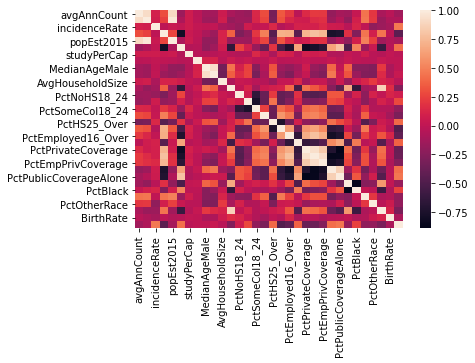

In [ ]:
cancer_corr_matrix = traindata.corr()
sns.heatmap(data=cancer_corr_matrix, annot=False)

In [ ]:
cancer_corr_matrix['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.467683
PctPublicCoverageAlone     0.456804
povertyPercent             0.427118
PctPublicCoverage          0.422291
PctHS25_Over               0.403449
PctUnemployed16_Over       0.379085
PctHS18_24                 0.284328
PctBlack                   0.250954
PctNoHS18_24               0.075815
MedianAgeFemale            0.034693
MedianAge                  0.002772
MedianAgeMale             -0.002006
studyPerCap               -0.023890
AvgHouseholdSize          -0.030288
avgDeathsPerYear          -0.074008
BirthRate                 -0.088322
popEst2015                -0.111470
avgAnnCount               -0.130745
PctWhite                  -0.173265
PctOtherRace              -0.189210
PctAsian                  -0.202352
PctSomeCol18_24           -0.206337
PctEmpPrivCoverage        -0.257117
PercentMarried            -0.262946
PctBachDeg18_24           -0.292220
PctMarriedHouseholds      -0.298414
PctPrivateCoverageAlone   -0

In [ ]:
cancer_features = ['incidenceRate','PctPublicCoverageAlone', 'medIncome', 'PctBachDeg25_Over']
cancer_labels = ['TARGET_deathRate']
cancer_train_features = traindata[cancer_features]
cancer_train_labels = traindata[cancer_labels]
cancer_test_features = testdata[cancer_features]

In [ ]:
lr = LinearRegression()
lr.fit(cancer_train_features, cancer_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prlr = lr.predict(cancer_test_features)

lr_df = pd.DataFrame(prlr.reshape(len(prlr),1))
lr_df.rename(columns={0:'prediction'}, inplace=True)
lr_df.head(5)

,prediction
0,166.749173
1,194.332745
2,148.949483
3,173.812952
4,168.179838


In [ ]:
res=pd.DataFrame(prlr)
res.index=cancer_test_features.index
res.columns=["prediction"]

from google.colab import files
res.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfc = RandomForestRegressor(random_state=1)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	9 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	10 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	11 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	12 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	13 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	14 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	15 / 100
Confirmed: 	26
Tentative: 	3
Rejected: 	13
Iteration: 	16 / 100
Confirmed: 	26
Tentative: 	3
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=76, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F3EA7D6EEB8,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns), 'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,avgAnnCount,1
30,BirthRate,1
29,PctMarriedHouseholds,1
28,PctOtherRace,1
27,PctAsian,1
26,PctBlack,1
25,PctWhite,1
24,PctPublicCoverageAlone,1
23,PctPublicCoverage,1
22,PctEmpPrivCoverage,1


In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(test_new_data))

In [ ]:
rf_important = RandomForestRegressor(random_state=1, n_estimators=1000, n_jobs = -1)
rf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
pdbp = rf_important.predict(X_important_test)

pd_br = pd.DataFrame(pdbp.reshape(len(pdbp),1))
pd_br.rename(columns={0:'prediction'}, inplace=True)
pd_br.head()

,prediction
0,137.8870
1,200.1325
2,160.9455
3,155.1342
4,159.8048


In [ ]:
x=pd.DataFrame(X_important_test)
pd_br.index=x.index
pd_br.columns=["prediction"]

from google.colab import files
pd_br.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, download this notebook and submit it on the platform: https://dphi.tech/practice/challenge/52#notebooks 
